In [1]:
# Charity Smith
# Diving into Darkness: A Comparative Analysis of Batman Movies Through NLP and Sentiment Analysis
# Analyze Reviews for Most Popular Movie

In [42]:
# Import necessary libraries
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.utils import resample

In [43]:
# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charitysmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charitysmith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
# Read the CSV file that contains movie reviews into a DataFrame
df = pd.read_csv('batman_movie_reviews.csv')

# Convert all text in the DataFrame to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

df.head()

,Movie,Review
0,batman,tim burton's batman is a gothic superhero movi...
1,batman,"set to danny elfman’s triumphant score, burton..."
2,batman,the result is a film that may please adults mo...
3,batman,the gotham city created in batman is one of th...
4,batman,"it is both a technical and aesthetic triumph, ..."


In [45]:
# Function to preprocess reviews
def preprocess_review(text):
    # Check if text is NaN (missing value)
    if pd.isnull(text):
        return ""
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', str(text))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the review data
df['Cleaned_Review'] = df['Review'].apply(preprocess_review)

# Display the cleaned DataFrame
df.head()

,Movie,Review,Cleaned_Review
0,batman,tim burton's batman is a gothic superhero movi...,tim burtons batman gothic superhero movie embr...
1,batman,"set to danny elfman’s triumphant score, burton...",set danny elfmans triumphant score burtons fir...
2,batman,the result is a film that may please adults mo...,result film may please adults youngsters isnt ...
3,batman,the gotham city created in batman is one of th...,gotham city created batman one distinctive atm...
4,batman,"it is both a technical and aesthetic triumph, ...",technical aesthetic triumph fact made impressi...


NLP Approach: Using TextBlob for Sentiment Analysis

In [46]:
# Function to get the polarity of the review
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to get polarity scores
df['Polarity'] = df['Cleaned_Review'].apply(get_polarity)

# Classify the sentiment
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [47]:
# Calculate average polarity for each movie
average_polarity = df.groupby('Movie')['Polarity'].mean()

# Print the average sentiment values for each movie
print("Average Sentiment Polarity for each movie:")
print(average_polarity)

Average Sentiment Polarity for each movie:
Movie
batman             0.132296
the dark knight    0.108523
Name: Polarity, dtype: float64


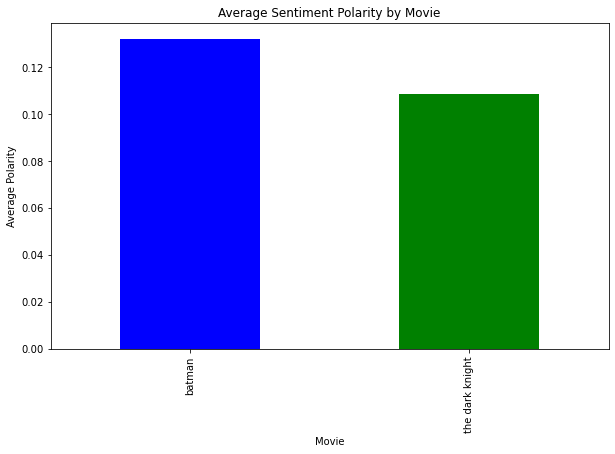

In [48]:
# Plot average polarity for each movie
plt.figure(figsize=(10, 6))
average_polarity.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Sentiment Polarity by Movie')
plt.ylabel('Average Polarity')
plt.xlabel('Movie')
plt.show()

The average sentiment polarity values for each movie indicate the overall sentiment expressed in the reviews for each movie. Sentiment polarity is a measure of the emotional tone of the text, ranging from -1 (very negative) to 1 (very positive). Here’s the interpretation of the values:

Batman: The average sentiment polarity for "Batman" is 0.132296. This value is positive, suggesting that, on average, the reviews for this movie have a slightly positive sentiment. It indicates that the general tone of the reviews is favorable.

The Dark Knight: The average sentiment polarity for "The Dark Knight" is 0.108523. This value is also positive but slightly lower than the average sentiment for "Batman." It suggests that the reviews for "The Dark Knight" are also generally positive, but the sentiment is slightly less positive compared to the reviews for "Batman."

Summary:
Both movies received generally positive reviews, but "Batman" has a slightly higher average sentiment polarity than "The Dark Knight," indicating a marginally more favorable reception based on the sentiment analysis of the reviews.

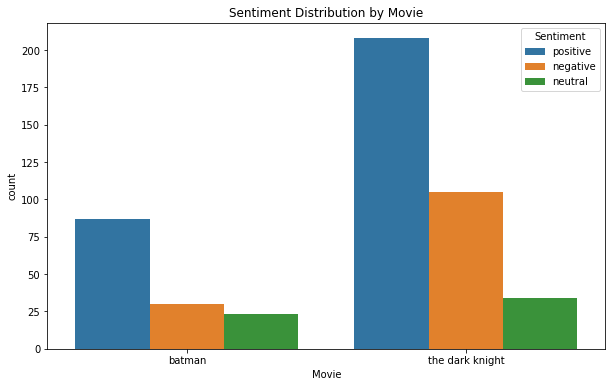

In [25]:
# Plot sentiment distribution for each movie
plt.figure(figsize=(10, 6))
sns.countplot(x='Movie', hue='Sentiment', data=df)
plt.title('Sentiment Distribution by Movie')
plt.show()

Machine Learning Approach: Using Naive Bayes for Sentiment Classification

In [30]:
# Convert text to features using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Review']).toarray()

# Target variable
y = df['Sentiment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

In [32]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.5816326530612245
Confusion Matrix:
 [[ 1  0 32]
 [ 0  0  9]
 [ 0  0 56]]
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.03      0.06        33
     neutral       0.00      0.00      0.00         9
    positive       0.58      1.00      0.73        56

    accuracy                           0.58        98
   macro avg       0.53      0.34      0.26        98
weighted avg       0.67      0.58      0.44        98



/Users/charitysmith/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charitysmith/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charitysmith/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

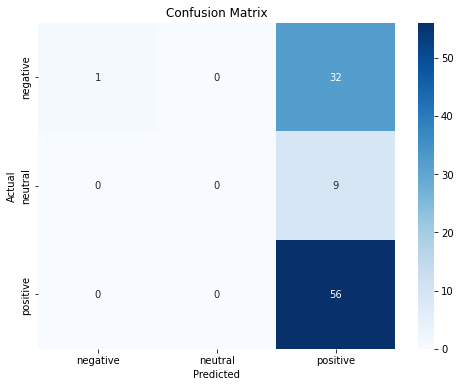

In [33]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.5816326530612245
This indicates that the model correctly predicted the sentiment of 58.16% of the reviews. This is not particularly high and suggests that the model may not be performing well overall.

The confusion matrix is:
negative (33 reviews): The model predicted 1 review correctly as negative and 32 incorrectly as positive.
neutral (9 reviews): The model predicted none of the neutral reviews correctly and misclassified all 9 as positive.
positive (56 reviews): The model predicted all 56 positive reviews correctly.

The model performs well for the positive class but poorly for the negative and neutral classes.
The overall accuracy of 58.16% suggests that the model is biased towards predicting the positive class, likely because the positive class has the highest support (56 out of 98 reviews).
The model's poor performance in predicting negative and neutral sentiments indicates that it struggles to differentiate these sentiments from positive ones.

Addressing this imbalance through resampling or class weighting could improve the model's performance.

Improved Machine Learning Approach

In [37]:
# Resample to address class imbalance
positive = df[df['Sentiment'] == 'positive']
neutral = df[df['Sentiment'] == 'neutral']
negative = df[df['Sentiment'] == 'negative']

# Upsample minority classes
neutral_upsampled = resample(neutral, replace=True, n_samples=len(positive), random_state=42)
negative_upsampled = resample(negative, replace=True, n_samples=len(positive), random_state=42)

# Combine majority class with upsampled minority classes
df_balanced = pd.concat([positive, neutral_upsampled, negative_upsampled])

# Feature extraction using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_balanced['Cleaned_Review']).toarray()
y = df_balanced['Sentiment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.864406779661017
Confusion Matrix:
 [[46  0  2]
 [ 6 61  0]
 [14  2 46]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.96      0.81        48
     neutral       0.97      0.91      0.94        67
    positive       0.96      0.74      0.84        62

    accuracy                           0.86       177
   macro avg       0.87      0.87      0.86       177
weighted avg       0.89      0.86      0.87       177



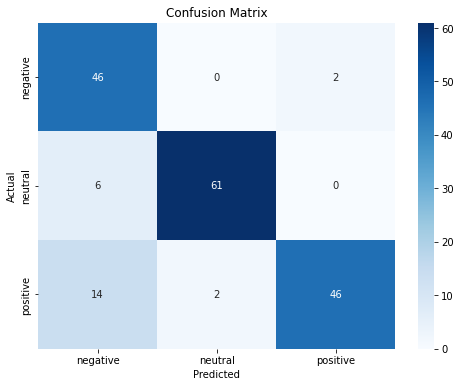

In [38]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

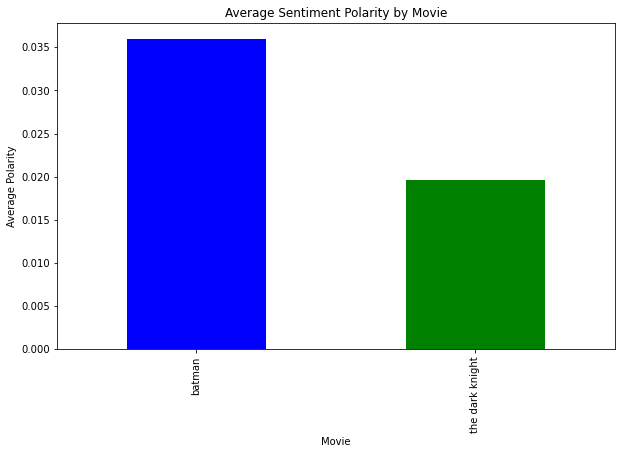

In [39]:
# Plot average polarity for each movie
average_polarity = df_balanced.groupby('Movie')['Polarity'].mean()
plt.figure(figsize=(10, 6))
average_polarity.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Sentiment Polarity by Movie')
plt.ylabel('Average Polarity')
plt.xlabel('Movie')
plt.show()

Accuracy: 0.864406779661017
This indicates that the model correctly predicted the sentiment of approximately 86.44% of the reviews. This is a significant improvement over the previous model.

The confusion matrix is:
negative (48 reviews): The model predicted 46 reviews correctly as negative, 0 as neutral, and 2 incorrectly as positive.
neutral (67 reviews): The model predicted 61 reviews correctly as neutral, 6 incorrectly as negative, and 0 as positive.
positive (62 reviews): The model predicted 46 reviews correctly as positive, 2 incorrectly as neutral, and 14 incorrectly as negative.

The model performs well overall, with a high accuracy of 86.44%.
Negative Sentiment: High recall (96%) but lower precision (70%), indicating that most negative reviews are correctly identified, but there are some false positives.
Neutral Sentiment: Excellent precision (97%) and good recall (91%), indicating that the model accurately identifies neutral reviews with few misclassifications.
Positive Sentiment: High precision (96%) but lower recall (74%), indicating that most predicted positive reviews are indeed positive, but some positive reviews are missed.


The model performs significantly better than the previous version, especially in handling class imbalance.

In [41]:
# Determine the best movie based on overall review sentiment analysis
best_movie = average_polarity.idxmax()
print(f'The best movie based on overall review sentiment analysis is: {best_movie}')

The best movie based on overall review sentiment analysis is: batman
